In [34]:
import analysis.indicator as indicator
import analysis.candle as candle
import matplotlib.pyplot as plt
import mplfinance as mpf
from data import getData as getData

In [35]:
symbol = 'ETH/USDT'
timeframe = '15m'

In [36]:
df = getData.get_historical_data(symbol,timeframe,48)
df['SMA_100'] = indicator.analysis_sma(df['close'],100)
df['EMA_50'] = indicator.analysis_ema(df['close'],50)
print(df)

                        open     high      low    close     volume    SMA_100   
timestamp                                                                       
2023-05-18 18:15:00  1778.42  1783.99  1775.00  1781.62  57947.173        NaN  \
2023-05-18 18:30:00  1781.61  1788.92  1779.82  1783.55  50204.612        NaN   
2023-05-18 18:45:00  1783.54  1785.91  1782.04  1784.55  20322.956        NaN   
2023-05-18 19:00:00  1784.54  1788.09  1782.03  1786.81  28843.930        NaN   
2023-05-18 19:15:00  1786.81  1788.64  1785.46  1787.88  17169.690        NaN   
...                      ...      ...      ...      ...        ...        ...   
2023-05-20 17:00:00  1815.00  1815.43  1813.66  1813.74   7082.814  1812.3850   
2023-05-20 17:15:00  1813.74  1813.78  1812.55  1812.97  10577.874  1812.3673   
2023-05-20 17:30:00  1812.96  1819.88  1812.83  1819.09  19388.025  1812.4121   
2023-05-20 17:45:00  1819.09  1827.77  1819.08  1826.48  84683.734  1812.5629   
2023-05-20 18:00:00  1826.49

In [37]:
macd, signal, histogram = indicator.analysis_macd(df['close'])
print(f"${macd}")

$timestamp
2023-05-18 18:15:00         NaN
2023-05-18 18:30:00         NaN
2023-05-18 18:45:00         NaN
2023-05-18 19:00:00         NaN
2023-05-18 19:15:00         NaN
                         ...   
2023-05-20 17:00:00    0.675396
2023-05-20 17:15:00    0.442204
2023-05-20 17:30:00    0.742670
2023-05-20 17:45:00    1.559130
2023-05-20 18:00:00    2.015910
Length: 192, dtype: float64


In [38]:
# engulfing = candle.analysis_engulfing(df['open'],df['high'],df['low'],df['close'])
# print(engulfing)

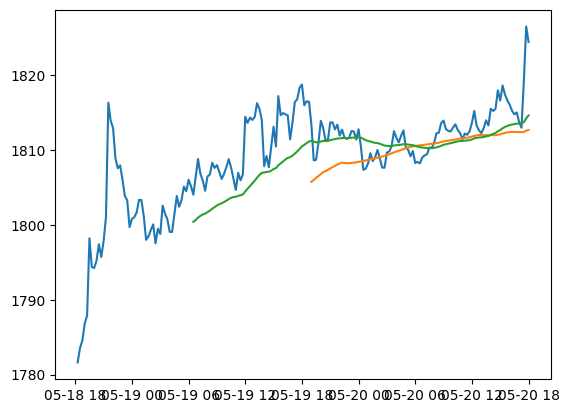

In [39]:
plt.plot(df['close'])
plt.plot(df['SMA_100'])
plt.plot(df['EMA_50'])


In [40]:
# plt.plot(engulfing)

In [41]:
df['RSI'] = indicator.analysis_rsi(df['close'])

In [42]:
macd, signal, histogram = indicator.analysis_macd(df['close'])
c = ['red' if cl < 0 else "green" for cl in histogram]

In [43]:
oi = indicator.analysis_oi(symbol)

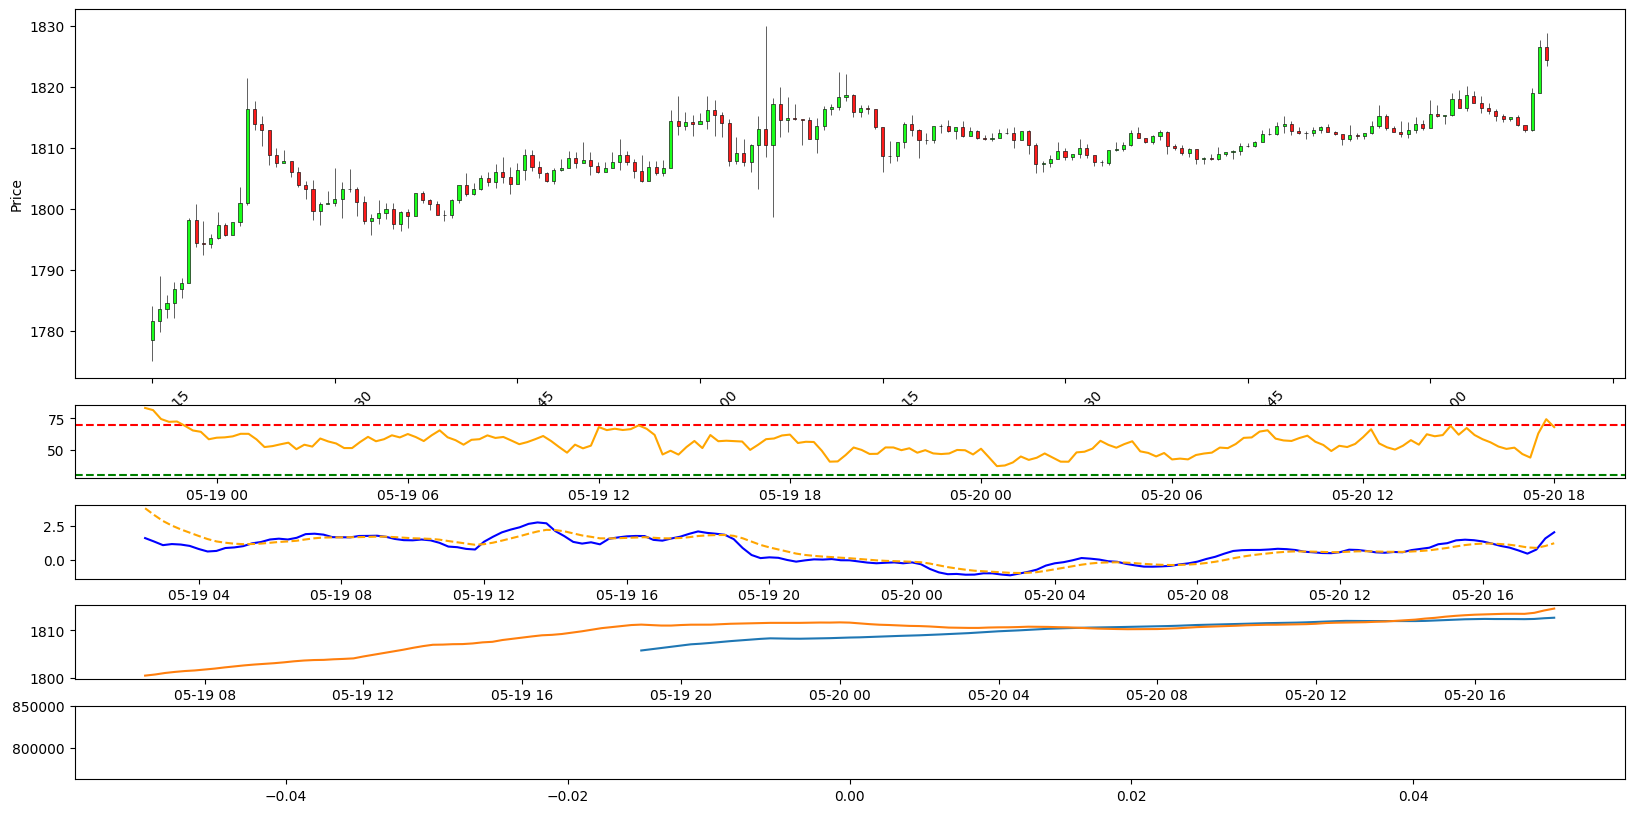

In [44]:
fig, axs = plt.subplots(5,1,gridspec_kw={"height_ratios":[10,2,2,2,2]},figsize=(20,10))
colors = mpf.make_marketcolors(up="#00ff00",down="#ff0000")
mpf_style = mpf.make_mpf_style(marketcolors=colors)
mpf.plot(df, type="candle", ax=axs[0],style=mpf_style)
axs[3].plot(df['SMA_100'])
axs[3].plot(df['EMA_50'])
# axs[3].plot(engulfing)
axs[1].axhline(y=70,color='r',linestyle='--')
axs[1].axhline(y=30,color='g',linestyle='--')
axs[1].plot(df["RSI"], color= "orange")
axs[2].plot(macd,'b-')
axs[2].plot(signal,'--', color="orange")
# axs[2].bar(histogram.index, histogram, color=c)
axs[4].plot(oi)